In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly
import plotly.express as px

In [2]:
churn_data = pd.read_csv('C:/Users/Евгений/Desktop/Обучение/IDE/__pycache__/panda/data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)

CustomerId — идентификатор клиента

Surname — фамилия клиента

CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

Geography — страна клиента (банк международный)

Gender — пол клиента

Age — возраст клиента

Tenure — сколько лет клиент пользуется услугами банка

Balance — баланс на счетах клиента в банке

NumOfProducts — количество услуг банка, которые приобрёл клиент

HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

EstimatedSalary — предполагаемая заработная плата клиента

Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [3]:
churn_data = churn_data.drop(columns='RowNumber', axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# ЗАДАНИЯ

## 9.1. 

Text(0.5, 1.0, 'Соотношение ушедших и лояльных клиентов')

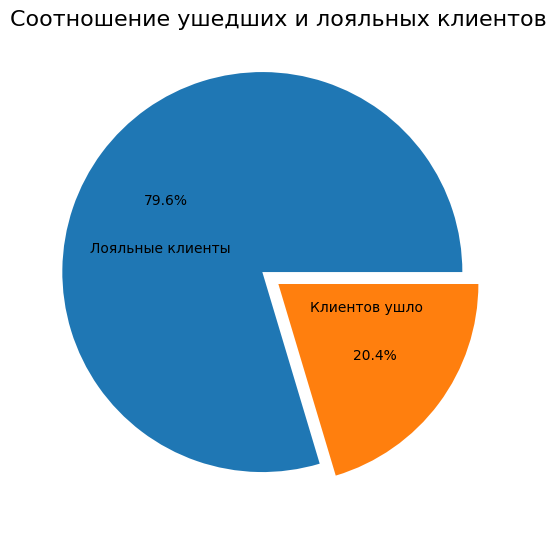

In [4]:
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data['Exited'].value_counts(),
    labels=['Лояльные клиенты', 'Клиентов ушло'],
    autopct='%.1f%%',
    labeldistance = 0.2,
    explode = [0.1, 0]
)
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16)

Таким образом мы видим, что большинство клиентом лояльны, и только чуть более 20% ушли

## 9.2. 

Text(0, 0.5, 'Количество клиентов')

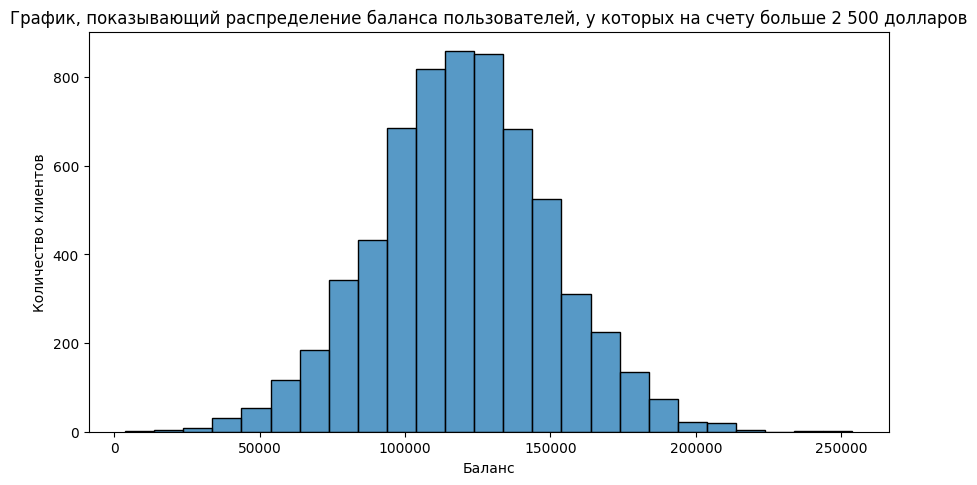

In [96]:

churn_data_balance = churn_data[churn_data['Balance'] > 2500]

fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1])
sns.histplot(churn_data_balance, x='Balance', binwidth=10000)
ax.set_title("График, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов")
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')

Из клиентов, у которых на счете болье 2500, в основном хранят средства в 100000-150000 долларов

## 9.3.

In [6]:
fig = px.histogram(
    data_frame= churn_data,
    x='Balance',
    color='Exited',
    nbins=15,
    title='Гистограмма распределения баланса в зависимости от лояльности клиента',
    width=800,
    height=500,
    marginal='box',
    histnorm='percent'
)
fig.show()

Ушли в основном с крупными суммами на счетах примерно с 37 тыс - 131, причем медианное значение  109, остались клиенты с балансом от 0 и чуть больше среднего 

## 9.4.

In [7]:
fig = px.histogram(
    data_frame= churn_data,
    x='Age',
    color='Exited',
    nbins=15,
    title='Распределение возраста в разрезе признака оттока',
    width=800,
    height=500,
    marginal='box',
    histnorm='percent'
)
fig.show()

В группе действующих клиентов больше потенциальных выбросов в возрасте от 57 лет - 92 лет, остались клиенты в основном молодые и среднего возраста, 20% ушедших большая часть из всех кто ушел это люди старше 40 лет и до 50 лет - это та группа на которую стоит обратить внимание

## 9.5.

In [41]:
df_df = churn_data.groupby(['CreditScore', 'Exited'], as_index=False)['EstimatedSalary'].median()
fig = px.scatter(
    data_frame= df_df,
    x= 'EstimatedSalary',
    y='CreditScore',
    color= 'Exited',
    width= 1200,
    height= 500,
    title= 'Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты по признаку оттока клиентов', 
)
fig.show()

Ушедшие клиенты  оставшиеся в основном в средней зоне по заработной плате, а по рейтингу равномерно, каких-то очевидных взаимосвязей не наблюдается, хотя можно заметить, что из числа  клиентов больше ушедших с низкой зарплатой меньше 50 тыс и с высокой больше 150 тыс, связи кредитного рейтинга и зарплаты между собой нет.

## 9.6

In [9]:
gender_df = churn_data.groupby('Gender', as_index=False)['Exited'].mean()

fig = px.pie(
    gender_df,
    values='Exited',
    names='Gender',
    height=600,
    width=900,
    title='Процентное соотношение из числа ушедших мужчин и женщин',
)
fig.show()

Больше всего из ушедших это женщины

## 9.7.

Text(0, 0.5, 'Количество клиентов')

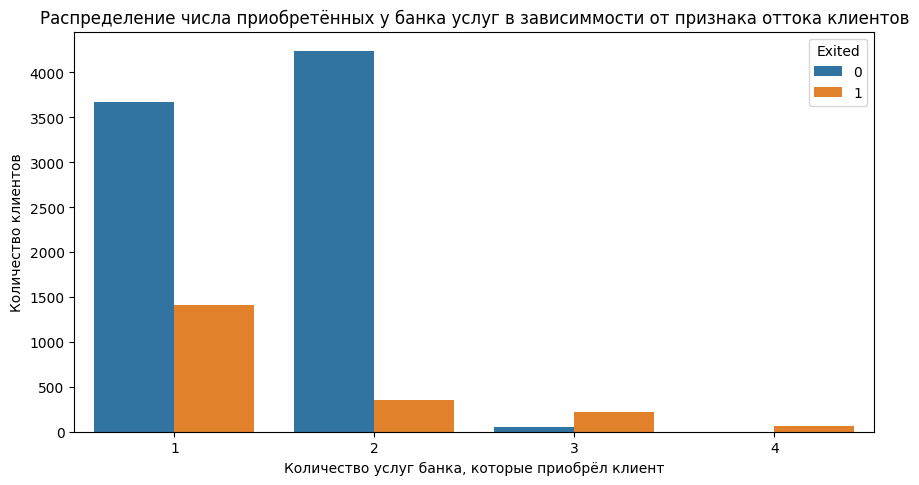

In [101]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1])
sns.countplot(x = 'NumOfProducts', hue = 'Exited',data = churn_data)
ax.set_title("Распределение числа приобретённых у банка услуг в зависиммости от признака оттока клиентов")
plt.xlabel('Количество услуг банка, которые приобрёл клиент')
plt.ylabel('Количество клиентов')


Наблюдаем, что ушедшие клиенты в большинстве пользовались одним продуктом, а действующие 2 продуктами, тремя и четырьмя почти никто не пользовался.

## 9.8.

Text(0, 0.5, 'Количество клиентов')

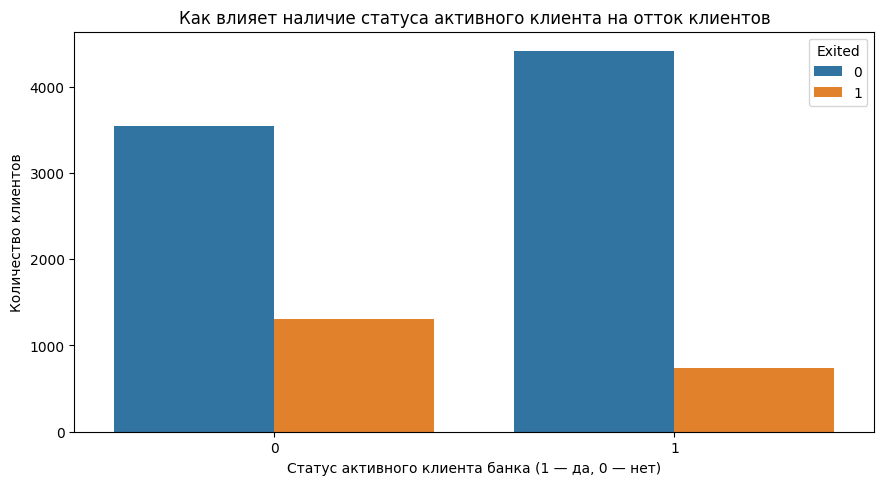

In [103]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1])
sns.countplot(x = 'IsActiveMember', hue = 'Exited',data = churn_data)
ax.set_title("Как влияет наличие статуса активного клиента на отток клиентов")
plt.xlabel('Статус активного клиента банка (1 — да, 0 — нет)')
plt.ylabel('Количество клиентов')

Активные клиенты меньше уходят, чем активные, возможно стоит заинтересовать клиента новыми продуктами, которыми они еще не пользуются, либо провести какие-то акции на мотивацию пользования продуктам, тем самым увеличить активность клиента. что в будущем может повлиять на решения клиента по уходу из банка. 

## 9.9.

In [113]:
Geography_df = churn_data.groupby(['Geography'], as_index=False).agg('mean')

fig = px.choropleth(
    data_frame=Geography_df, 
    locations='Geography', 
    locationmode = "country names", 
    color="Exited", 
    hover_name='Geography',
    range_color=[0, 0.4], 
    title='Доля ушедших клиентов по странам', 
    width=800, 
    height=500, 
    color_continuous_scale=px.colors.sequential.Plasma 
)
fig.show()

C:\Users\Евгений\AppData\Local\Temp\ipykernel_6240\1105687271.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Большая доля клиентов ушла из германии, если учитывать, что в основном ушли неактивные клиенты с одним продуктом, вероятно сократилось количество филиалов банка в данной стране.

## 9.10.

Text(0.5, 1.0, 'Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества')

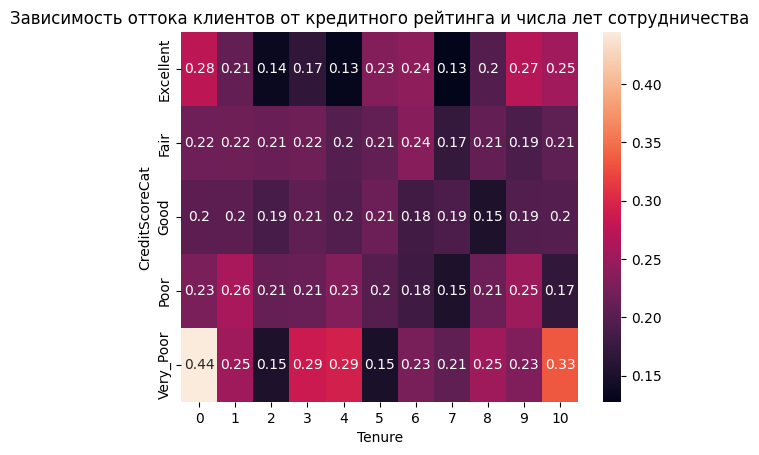

In [114]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
)
fig = plt.figure()
ax = sns.heatmap(data=pivot, annot=True);
ax.set_title('Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества')

Чаще всего уходят клиент с плохим кредитным рейтингом на первом году сотрудничества с банком